In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os.path as path
import wget
import scipy.optimize as optimize
import scipy

In [2]:
scipy.__version__

'1.8.0'

In [3]:
file = 'MediaMovilData.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ventas.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    Path_ = file

In [4]:
data = pd.read_csv(Path_)

In [5]:
x = data.Ventas
x

0     1250
1     1150
2      970
3     1100
4     1170
5     1080
6     1120
7     1230
8     1210
9     1050
10    1030
11     990
12    1160
13    1200
14    1180
15    1260
16    1230
17    1190
Name: Ventas, dtype: int64

In [6]:
def GetMediaMovil(x,n):
    
    
    media = np.zeros(x.shape[0]+1)
    # El último es la prediccion
    
    
    for i in range(len(x)+1):
        
        sum_ = 0.
        
        if i >= n:
            
            for j in range(i-n,i):
                sum_ += x[j]
                
            media[i] = sum_/n
  
        else:
            media[i] = x[i]
    

        
        
                              
    return media

In [7]:
def GetWeightedMediaMovil(x,n,w):
    
    
    media = np.zeros(x.shape[0]+1)
    # El último es la prediccion
    
    
    for i in range(len(x)+1):
        
        sum_ = 0.
        
        if i >= n:
            
            kk = 0
            for j in range(i-n,i):
                sum_ += x[j]*w[kk]
                kk += 1
                
            media[i] = sum_
  
        else:
            media[i] = x[i]
    
                              
    return media

In [8]:
media = GetMediaMovil(x,3)

In [9]:
w = np.array([0.2,0.2,0.6])
weightedmedia = GetWeightedMediaMovil(x,3,w)

In [10]:
print(media)

[1250.         1150.          970.         1123.33333333 1073.33333333
 1080.         1116.66666667 1123.33333333 1143.33333333 1186.66666667
 1163.33333333 1096.66666667 1023.33333333 1060.         1116.66666667
 1180.         1213.33333333 1223.33333333 1226.66666667]


In [11]:
print(weightedmedia)

[1250. 1150.  970. 1062. 1084. 1116. 1102. 1122. 1178. 1196. 1118. 1070.
 1010. 1100. 1150. 1180. 1232. 1226. 1212.]


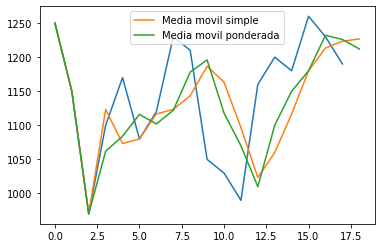

In [12]:
plt.plot(x)
plt.plot(media, label='Media movil simple')
plt.plot(weightedmedia, label='Media movil ponderada')
plt.legend()

In [13]:
def GetError(x,y):
    
    error = np.array([])
    
    for i in range(x.shape[0]):
        error = np.append(error, np.abs(x[i]-y[i]))
    
    return error, np.mean(error)

In [14]:
err1,meane = GetError(x,media)
print(meane)

63.518518518518526


In [15]:
err2,meane2 = GetError(x,weightedmedia)
print(meane2)

57.22222222222222


In [16]:
# Encontrando el conjunto de pesos que mínimize el error

def Root(w):
     
    weightedmedia = GetWeightedMediaMovil(x,3,w)
    Error1, MeanError = GetError(x,weightedmedia)
    return MeanError

In [17]:
cons = ({'type':'eq','func':lambda w: w[0]+w[1]+w[2]-1})

In [22]:
result = optimize.minimize(Root,(0.2,0.4,0.6),bounds=((0.,1.),(0.,1.),(0.,1.)),constraints=cons,method='TNC', tol = 1e-6)

In [23]:
result

     fun: 49.82506263763847
     jac: array([86.05542097, 92.16652899, 71.05541719])
 message: 'Max. number of function evaluations reached'
    nfev: 404
     nit: 6
  status: 3
 success: False
       x: array([0.36733991, 0.        , 0.66119748])

In [24]:
w1 = result.x
print(w1, np.sum(w1))

[0.36733991 0.         0.66119748] 1.0285373872944104


In [25]:
weightedmedia = GetWeightedMediaMovil(x,3,w1)
Error1, MeanError = GetError(x,weightedmedia)
print(MeanError)

49.82506263763847


In [26]:
# Optimizing
error = 1000

for i in range(100):
    
    a = np.random.rand()
    b = np.random.rand()
    c = np.abs(1 - a - b)
    
    result = optimize.minimize(Root,(a,b,c),bounds=((0.,1.),(0.,1.),(0.,1.)),constraints=cons,method='TNC',tol = 1e-8)
    w1 = result.x
    if np.sum(w1) <= 1.0:
        print(w1, np.sum(w1)) 
        weightedmedia = GetWeightedMediaMovil(x,3,w1)
        Error1, MeanError = GetError(x,weightedmedia)
        if MeanError < error:
            error = MeanError
            optimalw = w1
            print(MeanError)

[0.22683816 0.38256167 0.37534116] 0.9847409860142089
65.9980059973099
[1.38926665e-09 1.20364625e-01 8.74139524e-01] 0.9945041495368329
57.94419542614193
[0.16454363 0.46918288 0.36116484] 0.9948913562864152
[0.36509418 0.18555586 0.44354953] 0.9941995616040666
[0.45524936 0.10754346 0.41985909] 0.9826519137559696
[0.37817095 0.13705862 0.48419468] 0.9994242530794957
57.06721412789141
[0.16158258 0.55556549 0.26713553] 0.9842835976306854
[0.1582702  0.48806478 0.35143067] 0.9977656497643503
[0.43126794 0.10494753 0.45384063] 0.9900561022630805


In [28]:
np.sum(optimalw)
print(optimalw)

[0.37817095 0.13705862 0.48419468]


In [29]:
weightedmediaopt = GetWeightedMediaMovil(x,3,optimalw)
Error1, MeanError = GetError(x,weightedmediaopt)
print(MeanError)

57.06721412789141


In [28]:
weightedmediap = GetWeightedMediaMovil(x,3,[0.2,0.3,0.5])
Error1, MeanError = GetError(x,weightedmediap)
print(MeanError)

59.22222222222222


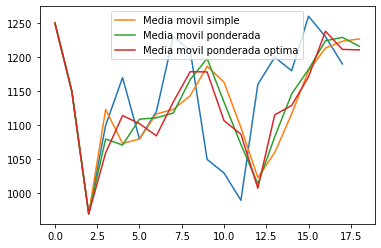

In [29]:
plt.plot(x)
plt.plot(media, label='Media movil simple')
plt.plot(weightedmediap, label='Media movil ponderada')
plt.plot(weightedmediaopt, label='Media movil ponderada optima')
plt.legend()

In [51]:
print(media[-1],weightedmediap[-1],weightedmediaopt[-1])

1226.6666666666667 1216.0 1190.2515501203638
